In [1]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def retrieve(size):
    with open(f"results/{size}", "r") as fp:
        rs = fp.read().split('\n')
        inp = rs[2][len("input time: "):].split(", ")
        inp = tuple(map(lambda x: float(x.split("ms")[0]), inp))
        gpu = rs[3][len("gpu time: "):].split(", ")
        gpu = tuple(map(lambda x: float(x.split("ms")[0]), gpu))
        out = rs[4][len("output time: "):].split(", ")
        out = tuple(map(lambda x: float(x.split("ms")[0]), out))
        tot = rs[5][len("total time: "):].split(", ")
        tot = tuple(map(lambda x: float(x.split("ms")[0]), tot))
        cpu = rs[6][len("Processing time for CPU: "):].split(", ")
        cpu = tuple(map(lambda x: float(x.split("ms")[0]), cpu))
        spd = float(rs[7][len("Average Speed up of GPU = "):])
    return (inp, gpu, out, tot, cpu, spd)

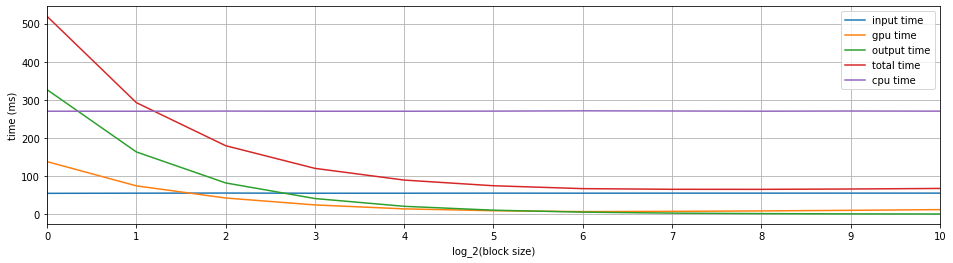

In [3]:
times = []
keys  = []
size = 1
while size <= 1024:
    i, g, o, t, c, s = retrieve(size)
    times.append((i[0], g[0], o[0], t[0], c[0]))
    keys.append(math.log2(size))
    size <<= 1

plt.figure(figsize=(16,4))
plt.xlim(1, 10)
plt.xticks(keys)
plt.grid(True)
plots = plt.plot(keys, times)
plt.legend(plots, ('input time', 'gpu time', 'output time', 'total time', 'cpu time'), loc='best')
plt.xlabel('log_2(block size)')
plt.ylabel('time (ms)')
plt.savefig("discussion/images/time_diff.pdf")

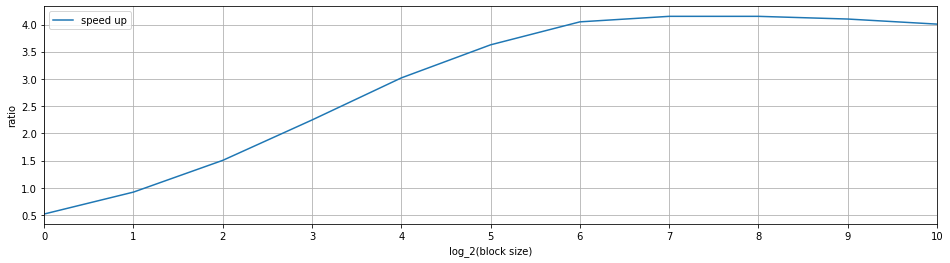

In [4]:
times = []
keys  = []
size = 1
while size <= 1024:
    i, g, o, t, c, s = retrieve(size)
    times.append(s)
    keys.append(math.log2(size))
    size <<= 1

plt.figure(figsize=(16,4))
plt.xlim(1, 10)
plt.xticks(keys)
plt.grid(True)
plots = plt.plot(keys, times)
plt.legend(plots, ('speed up',), loc='best')
plt.xlabel('log_2(block size)')
plt.ylabel('ratio')
plt.savefig("discussion/images/speedup.pdf")